Name: Aditya Kamath

Roll no.: C021

Semester: VI

Program: B.Tech

Branch: EXTC

Date of performance: 12/02/2021

Date of Submission: 12/02/2021

Experiment Number: 4

## Aim:

a. To write a program in PYTHON to perform low pass averaging filtering in spatial domain on an image with Gaussian noise.

b. To write a program in PYTHON to perform median filtering in spatial domain on an image with salt and pepper noise.


## Theory:

Neighborhood processing in spatial domain:
Here, to modify one pixel, we consider values of the immediate neighboring pixels also. For this purpose, 3X3, 5X5 or 7X7 neighborhood mask can be considered.  Example of 3X3 mask is shown below.





---


f(x-1,y-1)	f(x-1,y)	f(x-1,y+1)


f(x,y-1)	f(x,y)	f(x,y+1)


f(x+1,y-1)	f(x+1,y)	f(x+1,y+1)




---




Low Pass filtering
It is also known as smoothing filter. It removes the high frequency content from the image. Low pass averaging filter mask is as shown.


---




1/9	1/9	1/9


1/9	1/9	1/9


1/9	1/9	1/9




---




Median Filtering
It is also known as nonlinear filtering. It is used to eliminate salt and pepper noise. Here the pixel value is replaced by median value of the neighbouring pixel.


Import Necessary Packages

In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from skimage import io

# low pass averaging filtering in spatial domain

500 500
<class 'numpy.ndarray'>


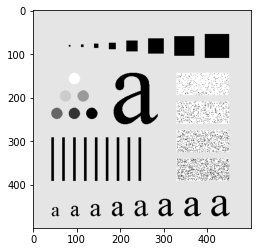

In [ ]:
#Read the original image and know its properites
img= cv2.imread('/content/Fig0333(a)(test_pattern_blurring_orig).tif',0)                                   
m,n= img.shape
print(m,n)
print(type(img))
plt.imshow(img,cmap='gray')

 3X3 LPF

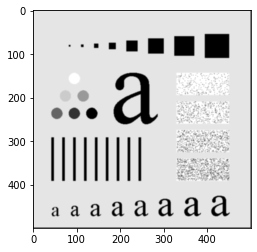

In [ ]:
# Develop Averaging filter(3, 3) mask 
mask = np.ones([3,3], dtype = int) 
mask = mask / 9

# Convolve the 3X3 mask over the image 
img_new = np.zeros([m, n]) 

for i in range(1, m-1): 
	for j in range(1, n-1): 
		temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
		
		img_new[i, j]= temp 
		
img_new = img_new.astype(np.uint8)
plt.imshow(img_new,cmap='gray',vmin=0,vmax=255)
#cv2.imwrite('blurred.tif', img_new) 


Generalised Low Pass Filtering

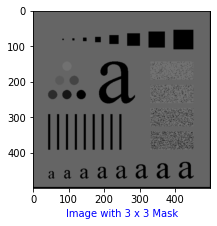

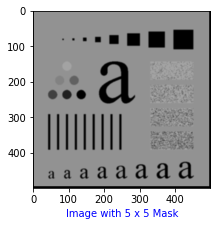

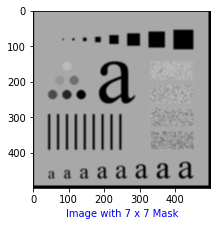

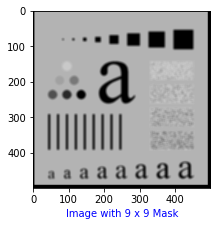

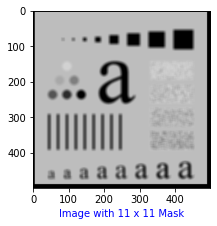

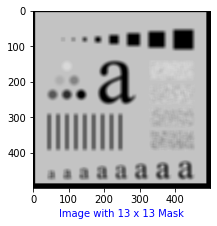

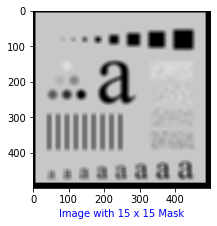

In [ ]:
for x in range(3,17,2):
  b = x
  a = b//2 
# Convolve the mask over the image 
  img_new = np.zeros([m, n],dtype=int) 

  for i in range(1, m-x):
    for j in range(1, n-x):
      temp= img[i-a:i+a,j-a:j+a] 
      c = np.sum(temp)
      img_new[i,j]= c//(b**2)


  img_new=img_new.astype(np.uint8) 
# Plot all images  
  fig = plt.figure()
  fig.set_figheight(15)
  fig.set_figwidth(15)	
  ax = fig.add_subplot(4,4,x)
  plt.imshow(img_new,cmap='gray',vmin=0,vmax=255)
  plt.xlabel("Image with {} x {} Mask".format(x,x),color = 'b')



# Median Filter

500 500
<class 'numpy.ndarray'>


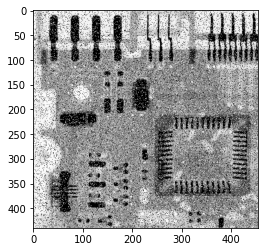

In [ ]:
#Read the original image and know its properites
img1= cv2.imread('/content/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif',0)                                   
m1,n1= img.shape
print(m1,n1)
print(type(img))
plt.imshow(img1,cmap='gray')

For a given input

Enter the size of mask: 3


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


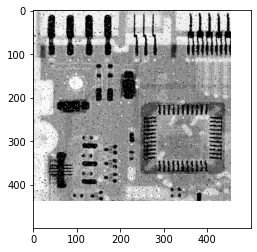

In [ ]:
img_saltless = np.ones([m1, n1]) 
b1 = int(input("Enter the size of mask: "))
a1 = b1//2
for i in range(1, m1-1): 
    for j in range(1, n1-1): 
        temp1 = img1[i-a1:i+a1 ,j-a1:j+a1]  
        
        constant= np.median(temp1)
        img_saltless[i,j]= constant

plt.imshow(img_saltless, cmap = 'gray')

Generalised Median Filtering

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


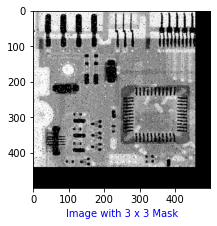

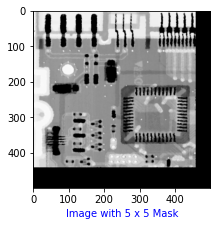

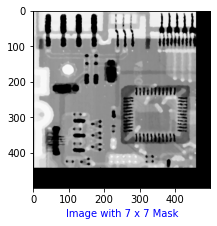

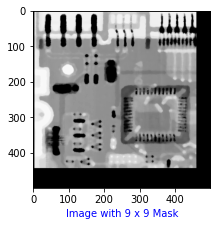

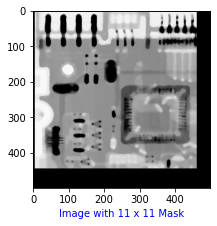

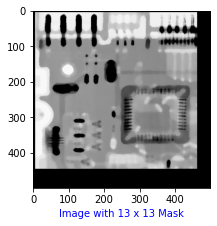

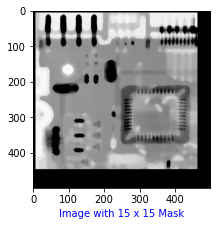

In [ ]:
for x in range(3,17,2):
  b = x
  a = b//2 
# Convolve the mask over the image 
  img_new = np.zeros([m, n],dtype=int) 

  for i in range(1, m-x):
    for j in range(1, n-x):
      temp1 = img1[i-a:i+a,j-a:j+a]
      constant= np.median(temp1)
      img_new[i,j]= constant.astype(int)


  img_new=img_new.astype(np.uint8) 
# Plot all images  
  fig = plt.figure()
  fig.set_figheight(15)
  fig.set_figwidth(15)	
  ax = fig.add_subplot(4,4,x)
  plt.imshow(img_new,cmap='gray',vmin=0,vmax=255)
  plt.xlabel("Image with {} x {} Mask".format(x,x),color = 'b')

# High Pass Filter

540 466
<class 'numpy.ndarray'>


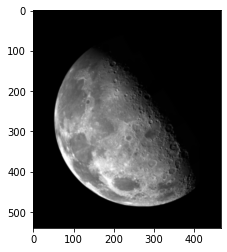

In [ ]:
#Read the original image and know its properites
img2= cv2.imread('/content/Fig0338(a)(blurry_moon).tif',0)                                   
m2,n2= img2.shape
print(m2,n2)
print(type(img2))
plt.imshow(img2,cmap='gray')

In [ ]:
#Laplacian mask
mask= np.array([[0,1,0],[1,-4,1],[0,1,0]])

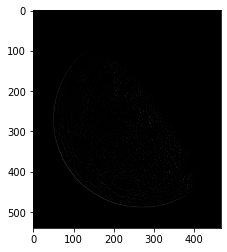

In [ ]:
#Convolve the 3X3 mask over the image 

img_new=np.zeros([m2,n2])
for i in range(1,m2-1):
    for j in range(1,n2-1):
        temp= img2[i-1,j-1]*mask[0,0]+img2[i-1,j]*mask[0,1]+img2[i-1,j+1]*mask[0,2]+img2[i,j-1]*mask[1,0]+img2[i,j]*mask[1,1]+img2[i,j+1]*mask[1,2]+img2[i+1,j-1]*mask[2,0]+img2[i+1,j]*mask[2,1]+img2[i+1,j+1]*mask[2,2]
      
        img_new[i,j]=temp

plt.imshow(img_new, cmap = 'gray', vmin=0, vmax= 255)

## Conclusion:

We successfully created a 

1.   low pass filter
2.   median filter
3.   high pass filter

We observed the variations in images obtained with respect to increase in the masking size.
The effect of mask increases as the size of mask increases, therefore increasing the blurring and clearing effect in respective images.
